# Run lots of Binomial trials for random values of p
Then investigate the distribution of p for a chosen type of observation.
The individual trials are Binomial (10, p).

### Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad

### Generate the data
User inputs number of Bin(10, p) trials; 10^6 gets good data and takes a few seconds.

In [36]:
p_list = []
n, trials = int(input("Trial size? 10 suggested. ")), 1
power = int(input("How many n-ples to run? 10^6 suggested. "))
for i in range(power):
    x = rd.random()
    p_list.append((x, np.random.binomial(n, x, trials)))

print(p_list[0:10])

Trial size? 10 is a classic; 100 gets certainty. 100
How many n-ples to run? 10^6 suggested. 1000000
[(0.13013431687659482, array([18])), (0.9815934643209753, array([98])), (0.8406067591266602, array([90])), (0.5667326384599799, array([64])), (0.13213187074090427, array([16])), (0.6444876501880141, array([70])), (0.20759400684549156, array([22])), (0.08200098989839943, array([12])), (0.6622348042535898, array([57])), (0.4099475954561781, array([31]))]


### Filter out the desired data, visualise and analyse the parameter's distribution.
NB for trials around 10^6, the experimental mean and deviation are very close to the theoretical statistics. User inputs desired observation from 10 trials, eg 2. If you chose a small number of trials above, then note that the default 100 bins in the histogram below will produce a less useful visualisation.

How many H of 10 trials did you see? 50


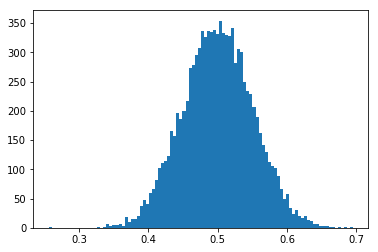

Empirical mean: 0.50009908735313646; Theoretical mean: 0.49999999999999994; Emp'l Ssev: 0.050393229201875465; The'l sdev: 0.04926646391590643 


In [39]:
shortlist_1 = [] # Contains pairs (probability, X_obs)
shortlist = [] # Contains only probabilities
study_val = int(input("How many H of %r trials did you see? " %(n)))
shortlist_temp = filter(lambda y: y[1]==study_val ,p_list)

for p in shortlist_temp:
    #print (p)
    shortlist_1.append(p)
    shortlist.append(p[0])

shortlist.sort()

plt.hist(shortlist, bins=100)
plt.show()

theoretical_mean = quad(lambda x: x**(1+study_val) * (1-x)**(n - study_val), 0, 1)[0] / quad(lambda x: x**study_val * (1-x)**(n - study_val), 0, 1)[0]
expected_square = quad(lambda x: x**(2+study_val) * (1-x)**(n - study_val), 0, 1)[0] / quad(lambda x: x**study_val * (1-x)**(n - study_val), 0, 1)[0]
theoretical_var = expected_square - theoretical_mean**2
theoretical_stdev = theoretical_var**0.5

print ("Empirical mean: %r; Theoretical mean: %r; Emp'l Sdev: %r; The'l sdev: %r " %(np.mean(shortlist), theoretical_mean, np.std(shortlist), theoretical_stdev))